# Индивидульное задание по мудулю "Визуализация данных"

Для выполнения задания был выбран датасет №2 со спском лэптопов с их техничесскими характеристиками

**Цель**: мы хотим выпустить ноутбук, но для этого нужно понимать оптимальные параметры для него. Следовательно, основываясь на пользовательском рейтинге, нам нужно выбрать оптимальную ОС, размер хранилища и т. п.

**Гипотеза**: если мы выпустим ноутбук с наиболее востребованными характеристиками, то он будет лучше продаваться.

### 1. Подключение и настройка датасета для дальнейшего изучения

Подключаем все библиотеки, необходимые для работы:

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Запишем данные из датасета в переменную и выведем его, используя библиотеку pandas:

In [169]:
df = pd.read_csv('laptops.csv')
df.head()

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0


In [170]:
df.shape

(984, 12)

Видно, что датасет содержит 984 строк и 12 столбцов. Проверим данные на дубликаты и удалим их:

In [171]:
df.drop_duplicates(inplace=True)

Выведем описательные характеристики датасета:

In [172]:
df.describe().round(2)

,Unnamed: 0,price(in Rs.),display(in inch),rating,no_of_ratings,no_of_reviews
count,984.00,984.00,984.00,688.00,688.00,688.0
mean,491.50,80960.72,15.15,4.28,718.09,83.9
std,284.20,57421.22,1.33,0.33,1750.82,211.6
min,0.00,15990.00,11.60,1.60,1.00,0.0
25%,245.75,42655.00,14.00,4.10,14.00,2.0
50%,491.50,62990.00,15.60,4.30,90.00,11.0
75%,737.25,94990.00,15.60,4.50,453.00,53.5
max,983.00,419990.00,35.00,5.00,15492.00,2054.0


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        984 non-null    int64  
 1   img_link          984 non-null    object 
 2   name              984 non-null    object 
 3   price(in Rs.)     984 non-null    int64  
 4   processor         984 non-null    object 
 5   ram               984 non-null    object 
 6   os                984 non-null    object 
 7   storage           984 non-null    object 
 8   display(in inch)  984 non-null    float64
 9   rating            688 non-null    float64
 10  no_of_ratings     688 non-null    float64
 11  no_of_reviews     688 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 99.9+ KB


Удалим 1 и 2 столбцы за их ненадобностью в дальнейшем исследовании:

In [174]:
df.drop(df.columns[[0,1]], axis= 1 , inplace= True)

Визуализируем пропущенные значения:

<Axes: >

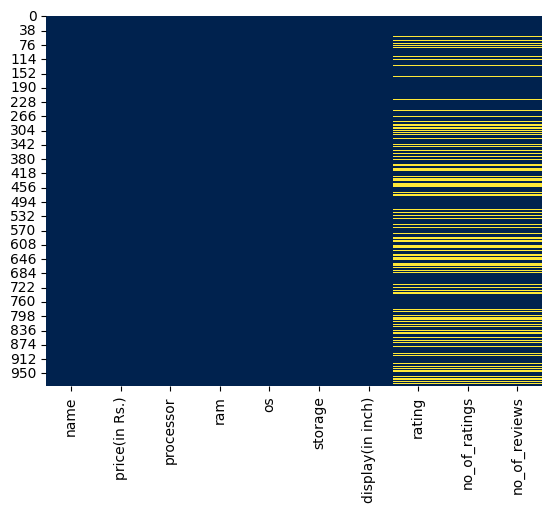

In [175]:
sns.heatmap(df.isnull(), cbar=False, cmap = 'cividis')

Заметим, что все пропущенные значения находятся только в трех последних столбцах, один из которых - это рейтинг. При этом если пропущенное значение присутствует в одной ячейке, то обязательно будет и во всех трех сразу.

**Важно**. Если исходить из цели, то нам необходимо выбрать оптимальные характеристики ноутбука, основываясь на пользовательском рейтинге. Если рейтинга нет, то такие данные для нашей цели бесмыссленны, поэтому мы их можем удалить.

При беглом проссмотре данного датасета были обнаружены две строки с некорректными данными об используемой постоянной памяти. Это строки 595 и 698. Удалим их, а также удалим все строки с пропусками и изменим индексы:

In [176]:
df.drop([595, 698], inplace=True)
df.dropna(inplace=True)
df = df.set_axis([i for i in range(df.shape[0])])

Приведет последние две колнки к типу данных int, так как в данный момент они представляют собой тип данных float. При этом столбец с диаганалью монитора лучше привести к типу данных object для удобства дальнейшей классификации:

In [177]:
df['no_of_ratings'] = df['no_of_ratings'].astype(np.int16)
df['no_of_reviews'] = df['no_of_reviews'].astype(np.int16)
df['display(in inch)'] = df['display(in inch)'].astype(str)

### 2. Исследование полученного датасета
#### 2.1 Общие характеристики продаж ноутбуков

Исходя из гипотезы, нам необходимо выяснить, как та или иная характеристика ноутбука влияет на продажи ноутбука. Для начала построим гистограмму цен:

Text(0, 0.5, 'Количество проданных ноутбуков')

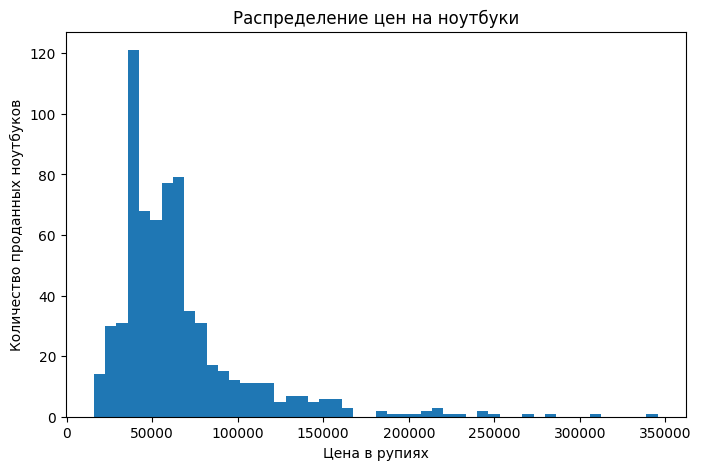

In [178]:
plt.figure(figsize=[8,5])
plt.hist(df['price(in Rs.)'], bins=50)
plt.title('Распределение цен на ноутбуки')
plt.xlabel('Цена в рупиях')
plt.ylabel('Количество проданных ноутбуков')

Видно, что цены наиболее продаваемых ноутбуков лежат в диапазоне от 30000 до 80000 рупий. При этом распределение имеет значительную ассимметрию. 

При расмотрении вопроса о максимальной прибыли не столько важен вопрос о количестве проданных ноутбуков, сколько об общей прибыли, которые они принесли. Добавим к нашемму датасету колноку, которая будет являться перемножением цены на количество покупок. Количество покупок мы в нулевом приближении можем принять равным количеству оценивших данные ноутбуки, то есть колонке 'no_of_ratings'.

In [179]:
df['Total'] = df['price(in Rs.)'] * df['no_of_ratings']

Выясним модель, которая принесла больше всего прибыли:

In [180]:
df.iloc[np.argmax(df['Total'])]

name                   APPLE MacBook Air M1
price(in Rs.)                        109990
processor                Apple M1 Processor
ram                           8 GB DDR4 RAM
os                  Mac OS Operating System
storage                          512 GB SSD
display(in inch)                       13.3
rating                                  4.7
no_of_ratings                          8865
no_of_reviews                           795
Total                             975061350
Name: 268, dtype: object

Этим ноутбуком оказалась модель компании Apple, что и не удивительно.

Добавим в датасет колонку с брендами ноутбуков. Для этого произведем разделение строк в колонке 'name' по пробелам и возьмем первое слово оттуда.

In [181]:
df['Brand'] =  pd.Series([i.split(' ')[0] for i in df['name']])

Сагрегируем данные по брендам:

In [182]:
brand_sum = df.groupby('Brand')['Total'].sum().sort_values(ascending = False).reset_index() # общая стоимость проданных ноутбуков 
brand_count = df.groupby('Brand')['no_of_ratings'].sum().sort_values(ascending = False).reset_index() # количество проданных ноутбуков 
brand_mean = df.groupby('Brand')['price(in Rs.)'].mean().sort_values(ascending = False).reset_index() # средняя стоимость модели

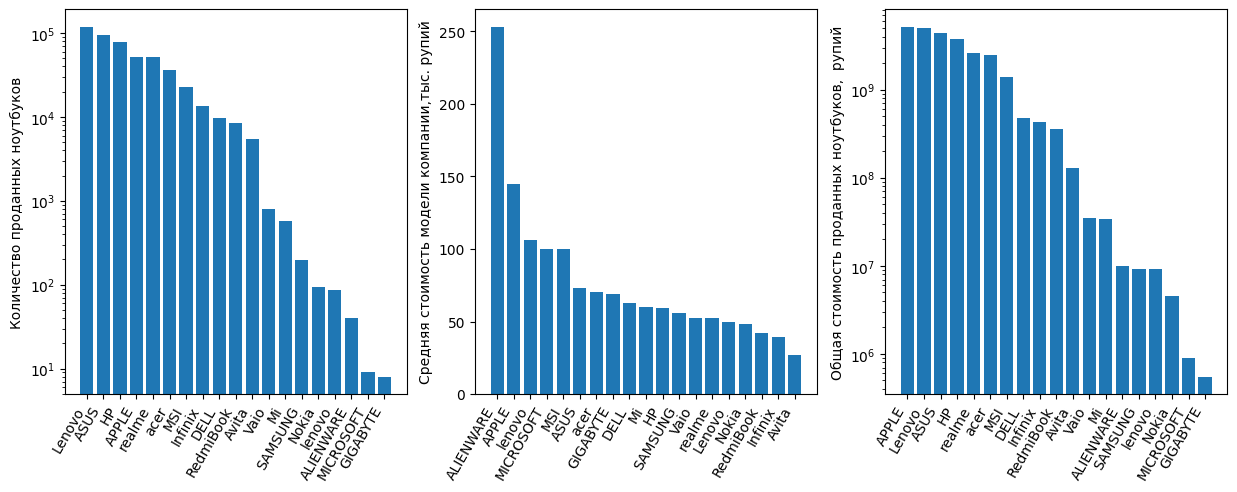

In [183]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize = [15,5])

ax[0].bar(brand_count['Brand'], brand_count['no_of_ratings'])
ax[0].set_yscale('log')
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=60, ha='right')
ax[0].set_ylabel('Количество проданных ноутбуков')

ax[1].bar(brand_mean['Brand'], brand_mean['price(in Rs.)']/1000)
ax[1].set_xticks(ax[1].get_xticks(), ax[1].get_xticklabels(), rotation=60, ha='right')
ax[1].set_ylabel('Средняя стоимость модели компании,тыс. рупий')

ax[2].bar(brand_sum['Brand'], brand_sum['Total'])
ax[2].set_yscale('log')
ax[2].set_xticks(ax[2].get_xticks(), ax[2].get_xticklabels(), rotation=60, ha='right')
ax[2].set_ylabel('Общая стоимость проданных ноутбуков,  рупий')

plt.savefig('brand_info.svg', bbox_inches = 'tight')

Выведем описательную характеристику датасета со средними ценами модели:

In [184]:
brand_mean.describe()

,price(in Rs.)
count,19.000000
mean,77067.191201
std,50862.740115
min,26890.000000
25%,51103.280000
50%,59990.000000
75%,86434.193481
max,252542.500000


На основе имеющихся данных можно сделать следующие выводы:
1. Слишком большая средняя стоимость модели не всегда гарантирует большую выручку с ее продаж (для примера компания Alienware). Стоимость должна быть на уровне средней или не выше нее на стандартное отклонение
2. Для больших продаж в большинстве случаев необходим известный бренд (я вообще не знал, что Gigabyte выпускает ноуты, продажи у них соответствующие (microsoft только недавно вышла на этот рынок со своими surface, поэтому их не берем в расчет))

Таким образом, даже без учета состава комплектующих можно сказать, что лучше всего продаются ноутбуки от известных бредов, стоимость которых выше средней по рынку

#### 2.2 Анализ отдельных комплектующих

Всего в выбранном датасете есть 5 видов технических характеристик: процессор, оперативная память, операционная система, объем и тип хранилища, а также диагональ дисплея. 

Для каждой технической характеристики построим гистограмму, чтобы узнать, какие решения наиболее популярны, а также сагрегируем данные рейтинга и суммарных продаж по уникальным техническим решениям. Под техническим решением я подразумеваю, к примеру, конкретную модель оперативной памяти из всего множества технической характеристики устройства, называемой оперативной памятью. Начнем с нее же:

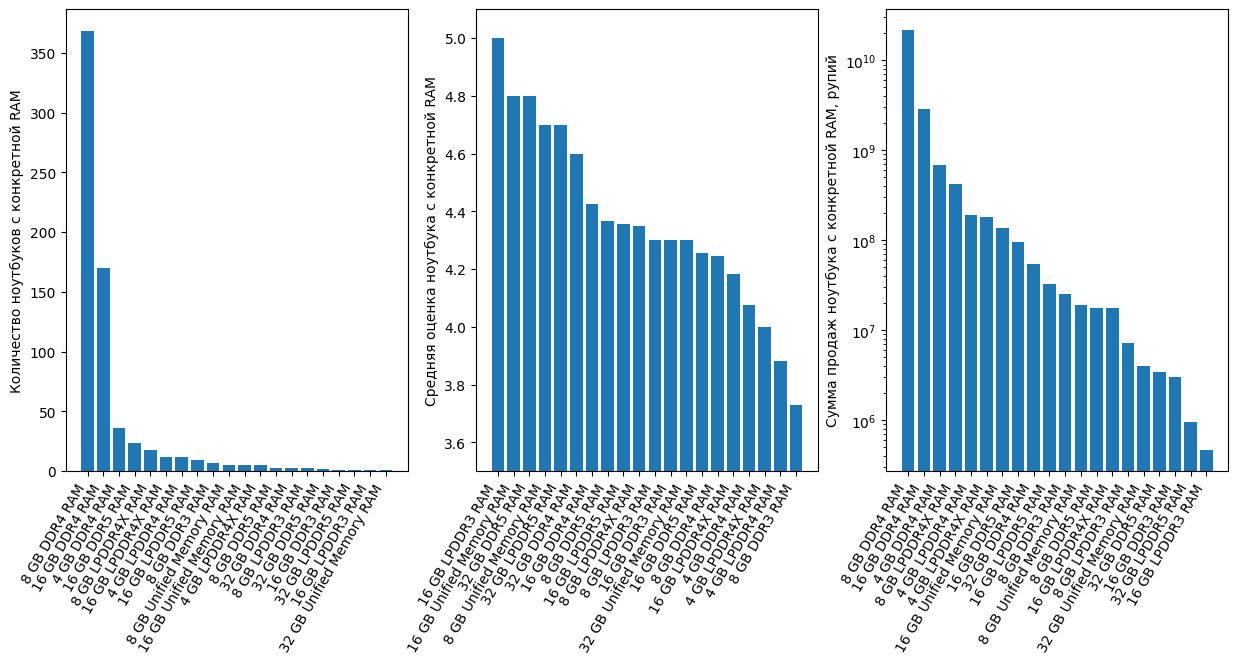

In [185]:
ram_mean = df.groupby('ram')['rating'].mean().sort_values(ascending = False).reset_index()
ram_count = df.groupby('ram')['rating'].count().sort_values(ascending = False).reset_index()
ram_sum = df.groupby('ram')['Total'].sum().sort_values(ascending = False).reset_index()

fig, ax = plt.subplots(ncols=3, nrows=1, figsize = [15, 6])

ax[0].bar(ram_count['ram'], ram_count['rating'])
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=60, ha='right')
ax[0].set_ylabel('Количество ноутбуков с конкретной RAM')

ax[1].bar(ram_mean['ram'], ram_mean['rating'])
ax[1].set_xticks(ax[1].get_xticks(), ax[1].get_xticklabels(), rotation=60, ha='right')
ax[1].set_ylabel('Средняя оценка ноутбука с конкретной RAM')
ax[1].set_ylim([3.5,5.1])

ax[2].bar(ram_sum['ram'], ram_sum['Total'])
ax[2].set_xticks(ax[2].get_xticks(), ax[2].get_xticklabels(), rotation=60, ha='right')
ax[2].set_ylabel('Сумма продаж ноутбуков с конкретной RAM, рупий')
ax[2].set_yscale('log')


plt.savefig('ram_info.svg', bbox_inches = 'tight')

Проведем аналогичный сбор данных о процессорах:

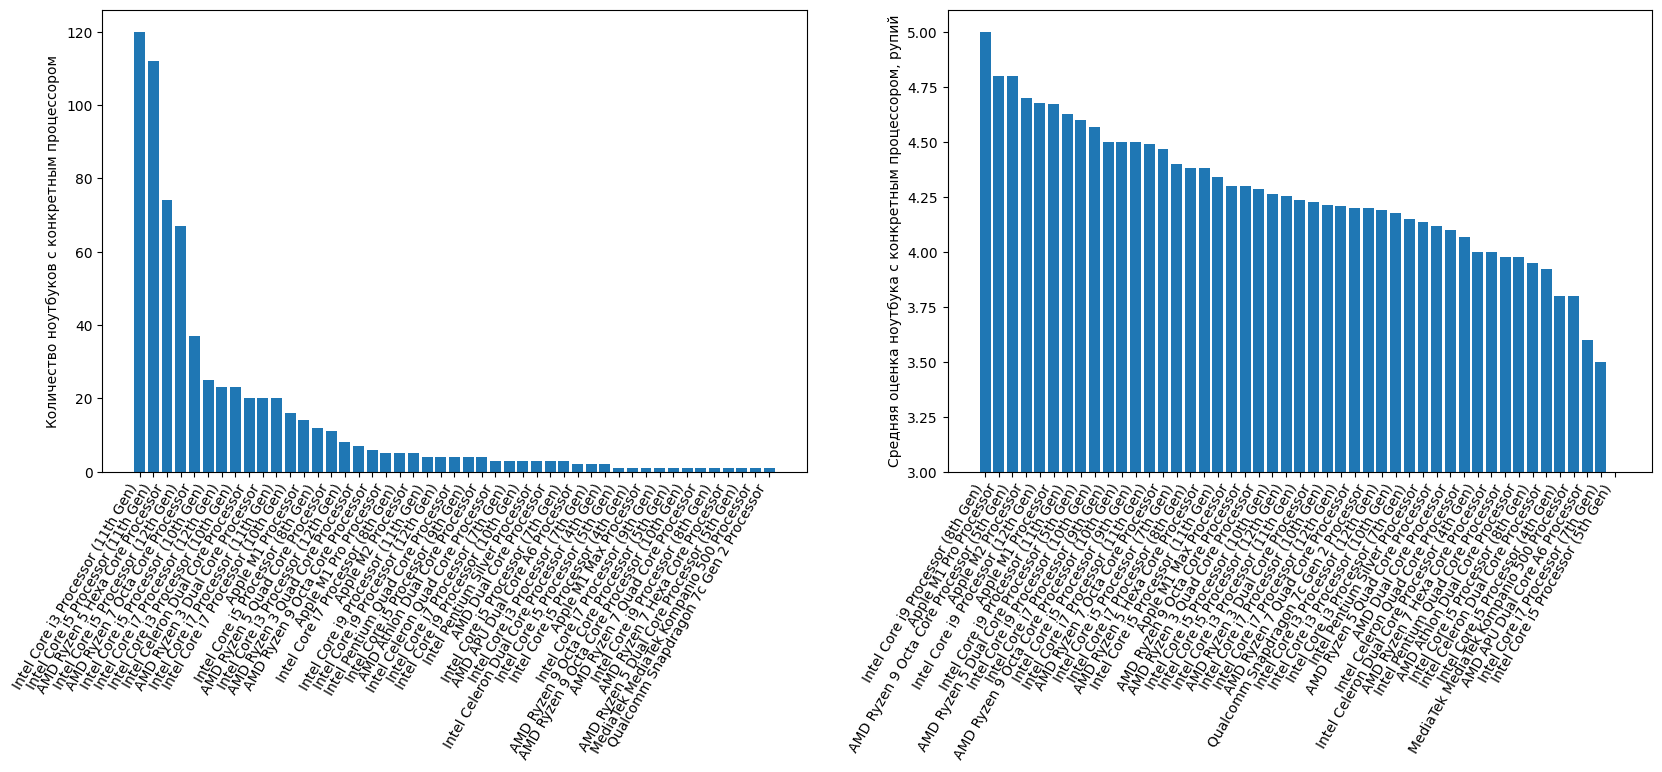

In [186]:
cp_mean = df.groupby('processor')['rating'].mean().sort_values(ascending = False).reset_index()
cp_count = df.groupby('processor')['rating'].count().sort_values(ascending = False).reset_index()

fig, ax = plt.subplots(ncols=2, nrows=1, figsize = [20, 6])

ax[0].bar(cp_count['processor'], cp_count['rating'])
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=60, ha='right')
ax[0].set_ylabel('Количество ноутбуков с конкретным процессором')

ax[1].bar(cp_mean['processor'], cp_mean['rating'])
ax[1].set_xticks(ax[1].get_xticks(), ax[1].get_xticklabels(), rotation=60, ha='right')
ax[1].set_ylabel('Средняя оценка ноутбуков с конкретным процессором, рупий')
ax[1].set_ylim([3,5.1])

plt.savefig('cp_info.svg', bbox_inches = 'tight')

Из-за большого разнообразия моделей процессоров я не стал делать еще один график, так как выглядело бы это крайне громоздко. 

Проведем аналогичный сбор данных для операционной системы:

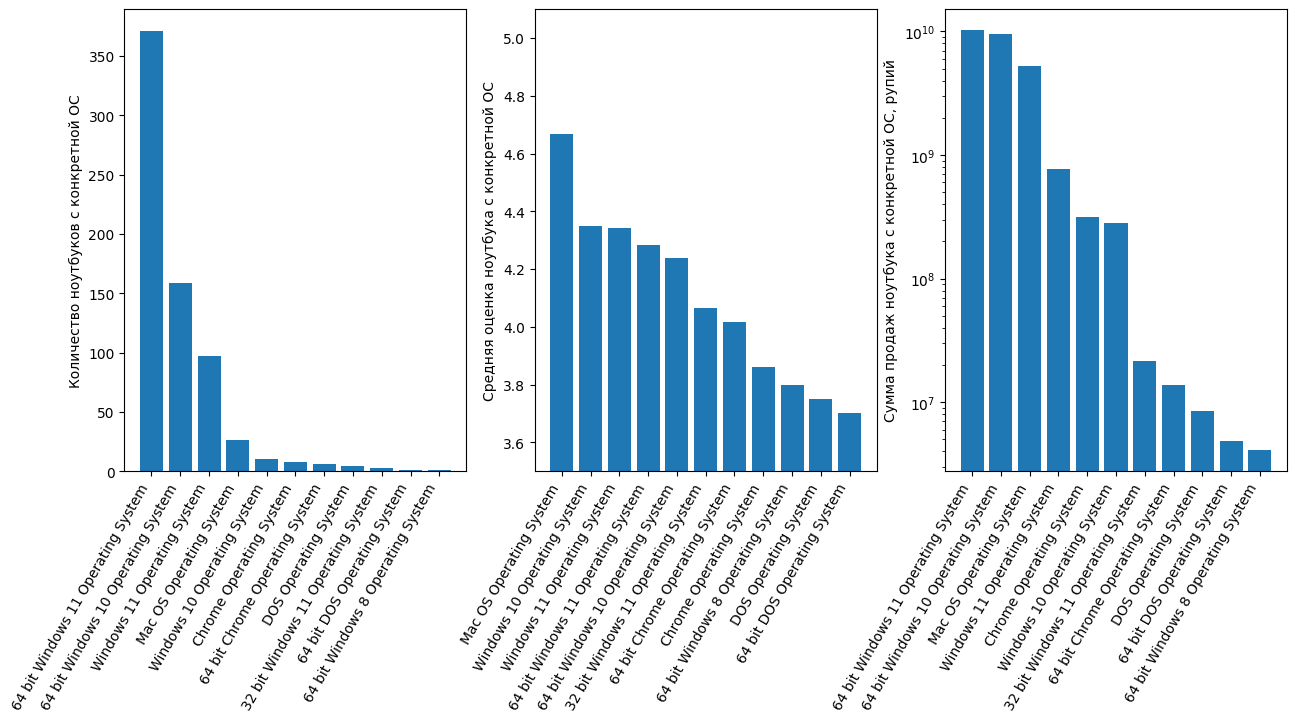

In [187]:
os_mean = df.groupby('os')['rating'].mean().sort_values(ascending = False).reset_index()
os_count = df.groupby('os')['rating'].count().sort_values(ascending = False).reset_index()
os_sum = df.groupby('os')['Total'].sum().sort_values(ascending = False).reset_index()

fig, ax = plt.subplots(ncols=3, nrows=1, figsize = [15, 6])

ax[0].bar(os_count['os'], os_count['rating'])
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=60, ha='right')
ax[0].set_ylabel('Количество ноутбуков с конкретной ОС')

ax[1].bar(os_mean['os'], os_mean['rating'])
ax[1].set_xticks(ax[1].get_xticks(), ax[1].get_xticklabels(), rotation=60, ha='right')
ax[1].set_ylabel('Средняя оценка ноутбука с конкретной ОС')
ax[1].set_ylim([3.5,5.1])

ax[2].bar(os_sum['os'], os_sum['Total'])
ax[2].set_xticks(ax[2].get_xticks(), ax[2].get_xticklabels(), rotation=60, ha='right')
ax[2].set_ylabel('Сумма продаж ноутбука с конкретной ОС, рупий')
ax[2].set_yscale('log')

plt.savefig('os_info.svg', bbox_inches = 'tight')

Для постоянной памяти (далее ПП):

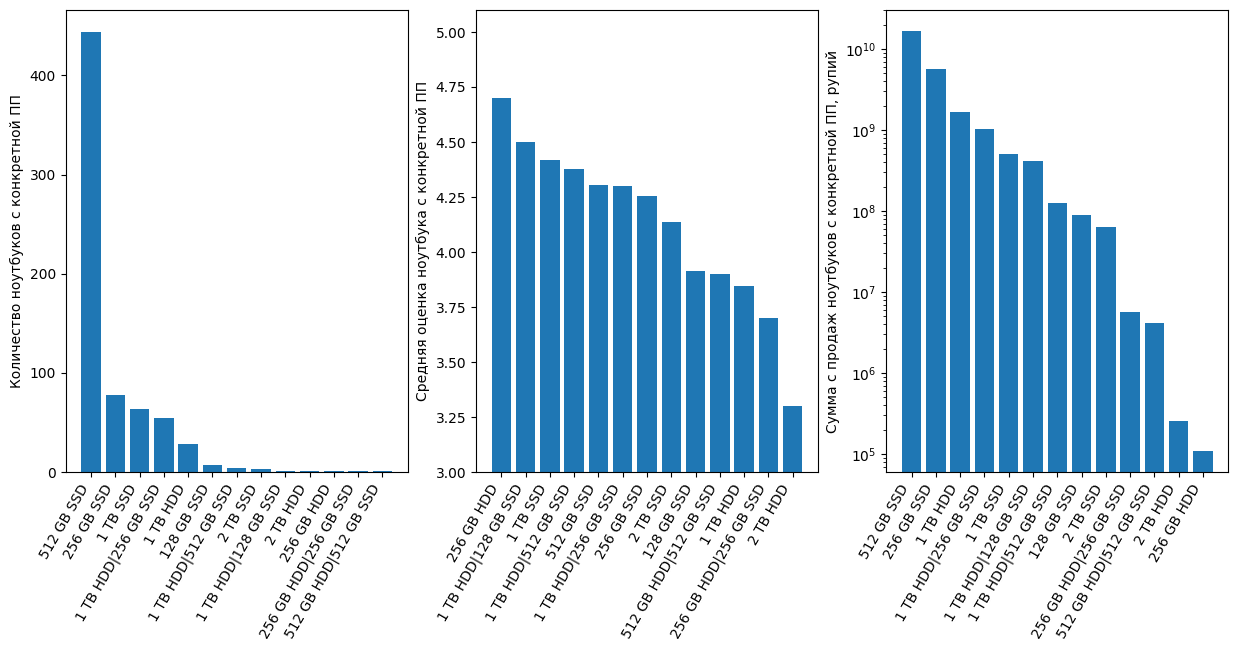

In [188]:
storage_mean = df.groupby('storage')['rating'].mean().sort_values(ascending = False).reset_index()
storage_count = df.groupby('storage')['rating'].count().sort_values(ascending = False).reset_index()
storage_sum = df.groupby('storage')['Total'].sum().sort_values(ascending = False).reset_index()

fig, ax = plt.subplots(ncols=3, nrows=1, figsize = [15, 6])

ax[0].bar(storage_count['storage'], storage_count['rating'])
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=60, ha='right')
ax[0].set_ylabel('Количество ноутбуков с конкретной ПП')

ax[1].bar(storage_mean['storage'], storage_mean['rating'])
ax[1].set_xticks(ax[1].get_xticks(), ax[1].get_xticklabels(), rotation=60, ha='right')
ax[1].set_ylabel('Средняя оценка ноутбука с конкретной ПП')
ax[1].set_ylim([3,5.1])

ax[2].bar(storage_sum['storage'], storage_sum['Total'])
ax[2].set_xticks(ax[2].get_xticks(), ax[2].get_xticklabels(), rotation=60, ha='right')
ax[2].set_ylabel('Сумма с продаж ноутбуков с конкретной ПП, рупий')
ax[2].set_yscale('log')

plt.savefig('storage_info.svg', bbox_inches = 'tight')

Для длины диагонали дисплея:

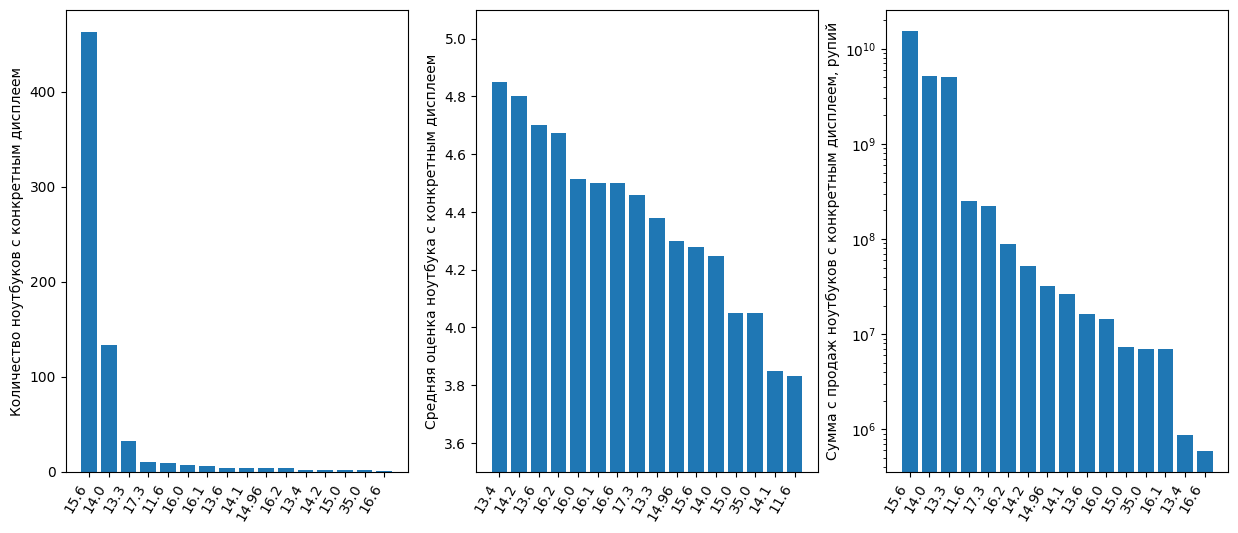

In [189]:
display_mean = df.groupby('display(in inch)')['rating'].mean().sort_values(ascending = False).reset_index()
display_count = df.groupby('display(in inch)')['rating'].count().sort_values(ascending = False).reset_index()
display_sum = df.groupby('display(in inch)')['Total'].sum().sort_values(ascending = False).reset_index()

fig, ax = plt.subplots(ncols=3, nrows=1, figsize = [15, 6])

ax[0].bar(display_count['display(in inch)'], display_count['rating'])
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=60, ha='right')
ax[0].set_ylabel('Количество ноутбуков с конкретным дисплеем')

ax[1].bar(display_mean['display(in inch)'], display_mean['rating'])
ax[1].set_xticks(ax[1].get_xticks(), ax[1].get_xticklabels(), rotation=60, ha='right')
ax[1].set_ylabel('Средняя оценка ноутбука с конкретным дисплеем')
ax[1].set_ylim([3.5,5.1])

ax[2].bar(display_sum['display(in inch)'], display_sum['Total'])
ax[2].set_xticks(ax[2].get_xticks(), ax[2].get_xticklabels(), rotation=60, ha='right')
ax[2].set_ylabel('Сумма с продаж ноутбуков с конкретным дисплеем, рупий')
ax[2].set_yscale('log')

plt.savefig('display_info.svg', bbox_inches = 'tight')

Исходя из полученных гистограмм, можно опровергнуть гипотезу, поставленную в начале задания. Для этого есть несколько причин, которые связанны с методикой выбора оптимальных технических решений, основанной на пользовательских оценках.

1. Каждое техническое решение с разной частотой встречается в разных моделях ноутбуков, поэтому разные технические решения в моделях часто обладают значительно различающимся количеством оценок. По этой причине сравнение некоторых из них попросту не имеет смысла из-за разной статистической значимости.
2. Не наблюдается видимой корреляции между наилучшими пользовательскими оценками каких-то технических решений и продажами ноутбуков с этими решениями. Так, к примеру самую высокую оценку среди дисплеев имеет дисплей с диагональю 13,4 дюймов, хотя и по количеству моделей и по суммарной выручке модели ноутбуков с данным дисплем находятся ближе к концу списка. Такая ситтуация наблюдается практически везде, за исключением оперционных систем, где наиболее популярные системы и являеются наиболее продаваемыми. Это, вероятно, связанно с общей ограниченностью рынка операционных систем и с тем, что все давно привыкли к предлагаемым решениям.
3. Нет конретных оценок каждого технического решения, а только общая оценка ноутбука, который является комплексом раличных технических решений. Так может появиться оценка 5 из 5, полученная только за красивый дисплей, хотя все остальные составляющие были не так хороши.

В таком случае если параметр "востребованность", выдвинутый в гипотезе, определяется пользовательскими оценками, а целью продаж является получение прибыли, то гипотезу уже можно считать опровергнутой на данном этапе.

Поэто, чисто для прикола, посмотрим на характеристики ноутбука с диагональю в 35 дюймов:

In [190]:
df.iloc[np.argmax(df['display(in inch)'])]

name                      DELL Vostro Core i5 11th Gen
price(in Rs.)                                    63090
processor           Intel Core i5 Processor (11th Gen)
ram                                      8 GB DDR4 RAM
os                  64 bit Windows 10 Operating System
storage                                     512 GB SSD
display(in inch)                                  35.0
rating                                             3.9
no_of_ratings                                       89
no_of_reviews                                        9
Total                                          5615010
Brand                                             DELL
Name: 445, dtype: object

In [191]:
disp_stor = pd.pivot_table(df, \
values='rating', \
index=['storage'],\
columns=['display(in inch)'], \
aggfunc=np.mean).fillna(0)


<Axes: xlabel='display(in inch)', ylabel='storage'>

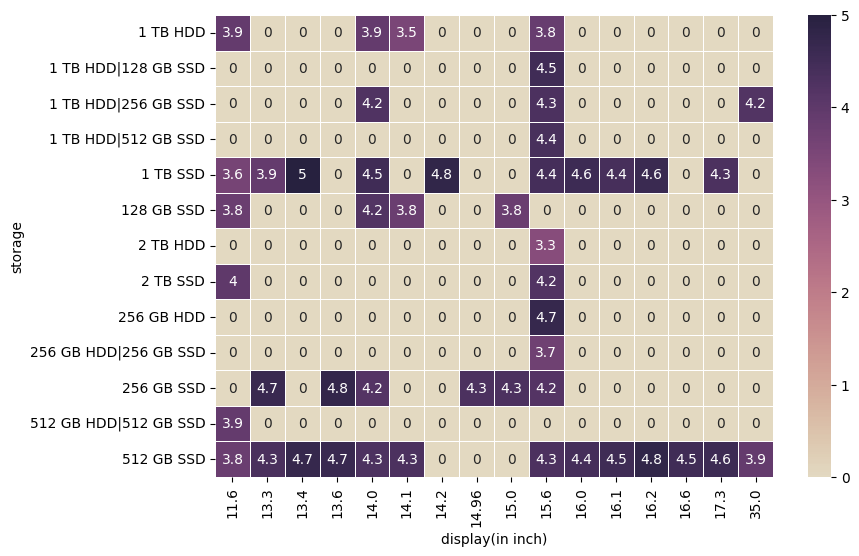

In [192]:
color = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(disp_stor, annot=True, linewidths=0.5, cmap=color)

In [193]:
ram_stor = pd.pivot_table(df, \
values='rating', \
index=['storage'],\
columns=['ram'], \
aggfunc=np.mean).fillna(0)

<Axes: xlabel='ram', ylabel='storage'>

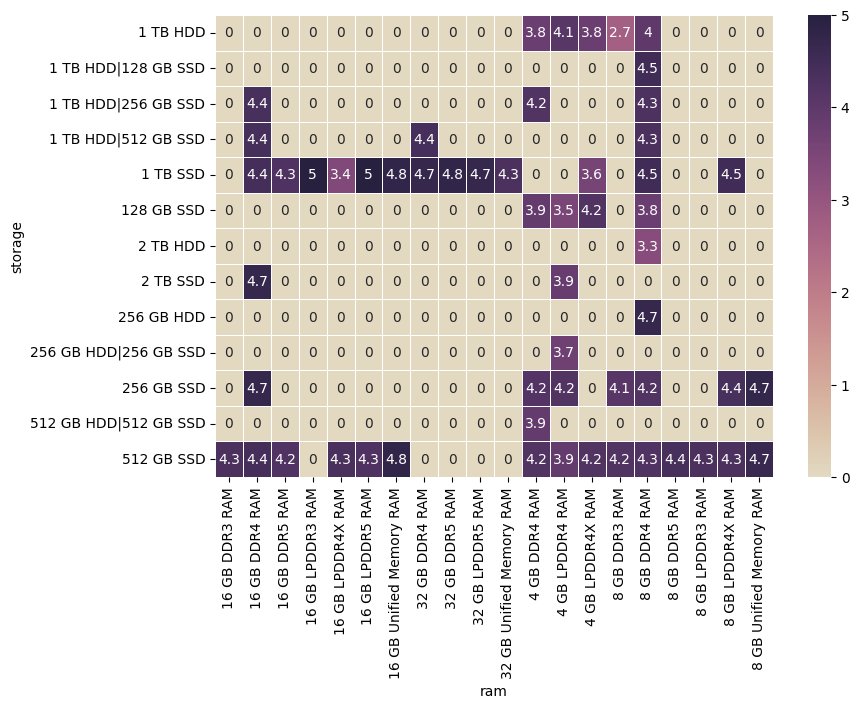

In [194]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(ram_stor, annot=True, linewidths=0.5, cmap=color)